In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#### Plot octagon arena ####

In [3]:
### define octagon coordinates

In [4]:
## variables
num_walls = 8
diameter = 36.21
radius = diameter/2
angle_sep = 2*math.pi/8       # angle between walls
vertex_offset = angle_sep/2


In [5]:
## calculate vertex coordinates

# for vertex coordinates: x
vertex_x = []

for i in range(num_walls):
    ang = i*angle_sep
    coord = math.sin(ang + vertex_offset)*radius
    vertex_x.append(coord)
vertex_x.append(vertex_x[0]) # repeat starting point for plotting

# for vertex coordinates: y
vertex_y = []
for i in range(num_walls):
    ang = i*angle_sep
    coord = math.cos(ang + vertex_offset)*radius
    vertex_y.append(coord)
vertex_y.append(vertex_y[0]) # repeat starting point for plotting

In [6]:
## calculate centre-wall coordinates
# Note that this is just a rotation of vertex coordinates by vertex_offset

# for centre-wall coordinates: x
centre_wall_x = []

for i in range(num_walls):
    ang = i*angle_sep
    coord = math.sin(ang)*radius
    centre_wall_x.append(coord)
centre_wall_x.append(centre_wall_x[0]) # repeat starting point for plotting
print(centre_wall_x)

# for centre-wall coordinates: y
centre_wall_y = []
for i in range(num_walls):
    ang = i*angle_sep
    coord = math.cos(ang)*radius
    centre_wall_y.append(coord)
centre_wall_y.append(centre_wall_y[0]) # repeat starting point for plotting

[0.0, 12.802168273382444, 18.105, 12.802168273382444, 2.217223029856283e-15, -12.802168273382442, -18.105, -12.802168273382446, 0.0]


In [7]:
### plot standard octagon

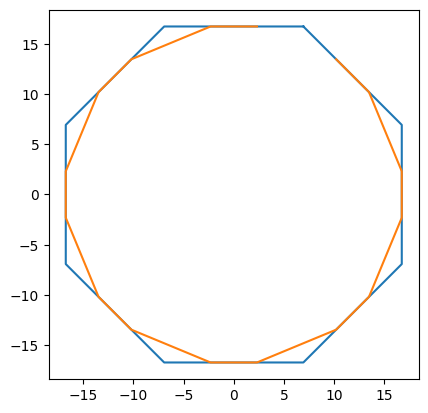

In [11]:
plt.plot(vertex_x, vertex_y)
plt.plot(vertex_x_thirds, vertex_y_thirds)
plt.gca().set_aspect(1.)

In [ ]:
### define octagon coordinates with alcoves

In [9]:
## use linear interpolation to find 1/3 and 2/3 coordinates for each wall
vertex_x_one_third = []
vertex_y_one_third = []
for i in range(num_walls):
    vertex_x_one_third.append((2/3)*vertex_x[i] + (1/3)*vertex_x[i+1])
    vertex_y_one_third.append((2/3)*vertex_y[i] + (1/3)*vertex_y[i+1])

vertex_x_two_thirds = []
vertex_y_two_thirds = []
for i in range(num_walls):
    vertex_x_two_thirds.append((1/3)*vertex_x[i] + (2/3)*vertex_x[i+1])
    vertex_y_two_thirds.append((1/3)*vertex_y[i] + (2/3)*vertex_y[i+1])

vertex_x_thirds = vertex_x_one_third + vertex_x_two_thirds
vertex_y_thirds = vertex_y_one_third + vertex_y_two_thirds

# interleave the one-thirds and two-thirds lists
lists_x = [vertex_x_one_third, vertex_x_two_thirds]
vertex_x_thirds = [val for tup in zip(*lists_x) for val in tup] 

# repeat for y
lists_y = [vertex_y_one_third, vertex_y_two_thirds]
vertex_y_thirds = [val for tup in zip(*lists_y) for val in tup] 


In [10]:
## calculate gradient of tangent
# first calculate gradient of each wall 
gradients = []
inverse_gradients = []
x_diffs = []
y_diffs =[]

for i in range(0,len(vertex_x_thirds), 2):
    print(i)
    diff_x = (vertex_x_thirds[i] + vertex_x_thirds[i+1])/2
    diff_y = (vertex_y_thirds[i] + vertex_y_thirds[i+1])/2
    x_diffs.append(diff_x)
    y_diffs.append(diff_y)

x_diffs = np.array(x_diffs)
y_diffs = np.array(y_diffs)
gradients = np.zeros(len(x_diffs))
inverse_gradients = np.zeros(len(x_diffs))


# for i in range(len(x_diffs)):
#     gradients.append(y_diffs[i]/x_diffs[i])

gradients = y_diffs/x_diffs
inverse_gradients = -(1/gradients)

print(gradients)
print(inverse_gradients)

## find coordinates that follow the inverse gradients from 1/3 and 2/3 along each line
## for a length equal to 1/3 line
        ## TODO
    

0
2
4
6
8
10
12
14
[ 1.00000000e+00  7.96484999e-17 -1.00000000e+00 -1.25551643e+16
  1.00000000e+00  1.59297000e-16 -1.00000000e+00 -3.13879107e+15]
[-1.00000000e+00 -1.25551643e+16  1.00000000e+00  7.96484999e-17
 -1.00000000e+00 -6.27758213e+15  1.00000000e+00  3.18594000e-16]
